In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
trainDataset = MNIST(root='./data', train=True, download=True)
testDataset = MNIST(root='./data',train=False,download=True )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.83MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.90MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
trainMean = torch.mean(trainDataset.data.float()/255.0)
trainStDeviation = torch.std(trainDataset.data.float()/255.0)
testMean = torch.mean(testDataset.data.float()/255.0)
testStDeviation = torch.std(testDataset.data.float()/255.0)

trainDataset.transform = transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize((trainMean,), (trainStDeviation,))])

testDataset.transform = transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize((testMean,),(testStDeviation,))])

In [5]:
class ANNClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.w1 = torch.randn(784,512, requires_grad=True, device = device)
        self.b1 = torch.randn(512, requires_grad= True, device = device)

        self.w2 = torch.randn(512, 256, requires_grad=True, device = device)
        self.b2 = torch.randn(256, requires_grad= True, device = device)

        self.w3 = torch.randn(256,128, requires_grad=True, device = device)
        self.b3 = torch.randn(128, requires_grad= True, device = device)

        self.w4 = torch.randn(128,10, requires_grad=True, device = device)
        self.b4 = torch.randn(10, requires_grad= True, device = device)

    def forward(self, x):
        x = self.flatten(x)

        hiddenLayer1_Input = torch.matmul(x, self.w1) + self.b1
        hiddenLayer1_Output = torch.relu(hiddenLayer1_Input)

        hiddenLayer2_Input = torch.matmul(hiddenLayer1_Output, self.w2) + self.b2
        hiddenLayer2_Output = torch.relu(hiddenLayer2_Input)

        hiddenLayer3_Input = torch.matmul(hiddenLayer2_Output, self.w3) + self.b3
        hiddenLayer3_Output = torch.relu(hiddenLayer3_Input)

        output = torch.matmul(hiddenLayer3_Output, self.w4) + self.b4
        return output

    def parameters(self):
        return [self.w1, self.b1, self.w2, self.b2, self.w3, self.b3,
                self.w4, self.b4]

In [6]:
def trainModel(model, optimizer, crossEntropyLoss, epochs):
    trainLoader = DataLoader(trainDataset, batch_size = 64, shuffle=True)

    losses = []

    for epoch in range(epochs):
        for x_batch, y_batch in trainLoader:
            model.train()

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            output = model(x_batch)
            loss = crossEntropyLoss(output, y_batch)
            loss.backward()
            optimizer.step()

            losses.append(loss)

        print(f"Epoch {epoch+1}: Losses: {losses[epoch]}")
    return model, losses

In [7]:
def evaluateModel(model):
    testLoader = DataLoader(testDataset, batch_size = 64, shuffle = False)

    y_true = []
    ypred = []
    model.eval()

    with torch.no_grad():
      for x_batch, y_batch in testLoader:

        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(x_batch)
        y_pred = torch.softmax(y_pred,1)
        y_pred = y_pred.cpu().detach().numpy()
        y_pred = np.argmax(y_pred, axis=1)
        y_batch = y_batch.cpu().detach().numpy()

        y_true.append(y_batch)
        ypred.append(y_pred)
    return y_true, ypred

Epoch 1: Losses: 52757.58984375
Epoch 2: Losses: 42258.89453125
Epoch 3: Losses: 49323.84375
Epoch 4: Losses: 40236.76171875
Epoch 5: Losses: 40459.0078125
Epoch 6: Losses: 36930.52734375
Epoch 7: Losses: 30507.376953125
Epoch 8: Losses: 33078.2109375
Epoch 9: Losses: 30350.603515625
Epoch 10: Losses: 28291.921875
Epoch 11: Losses: 24199.513671875
Epoch 12: Losses: 29532.421875
Epoch 13: Losses: 20214.388671875
Epoch 14: Losses: 23562.712890625
Epoch 15: Losses: 18360.7734375
Epoch 16: Losses: 20342.90625
Epoch 17: Losses: 21389.06640625
Epoch 18: Losses: 17147.900390625
Epoch 19: Losses: 21497.365234375
Epoch 20: Losses: 19324.009765625
Epoch 21: Losses: 18185.93359375
Epoch 22: Losses: 17661.45703125
Epoch 23: Losses: 18028.548828125
Epoch 24: Losses: 14965.337890625
Epoch 25: Losses: 14026.2861328125
Epoch 26: Losses: 12291.6328125
Epoch 27: Losses: 11656.279296875
Epoch 28: Losses: 14477.8076171875
Epoch 29: Losses: 11076.4111328125
Epoch 30: Losses: 14321.79296875
Epoch 31: Losses

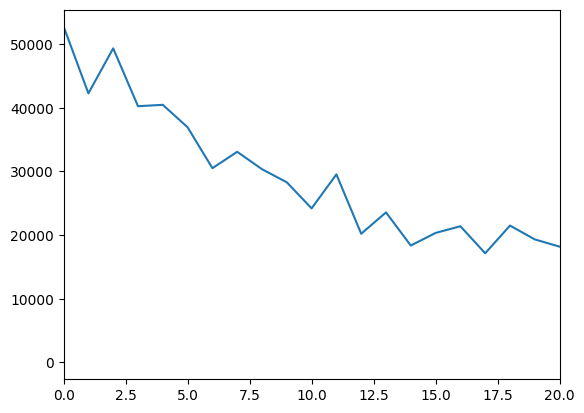

In [9]:
model = ANNClassification()
model = model.to(device)
entropyloss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)
model, losses = trainModel(model, optimizer, entropyloss, epochs = 100)


finalLoss = []
for loss in losses:
  loss = loss.cpu().detach().numpy()
  finalLoss.append(loss)
plt.plot(finalLoss)
plt.xlim(0,20)
plt.show()

Confusion Matrix: [[ 971    0    0    1    0    2    3    1    2    0]
 [   1 1126    1    4    0    1    1    1    0    0]
 [   4    0 1008   10    1    0    0    5    4    0]
 [   0    0    4  993    0    5    0    3    2    3]
 [   4    2    6    1  950    1    2    6    2    8]
 [   3    0    0   12    1  864    3    1    5    3]
 [   2    4    2    0    5    9  933    0    3    0]
 [   1    3   11    5    0    0    0 1003    1    4]
 [   1    0    5    8    2    4    1    5  940    8]
 [   3    4    1    6    6    5    1    8    2  973]]
Accuracy: 0.9761
Precision: 0.9760881014642943
Recall: 0.9757821034339544
F1: 0.9758905375555509


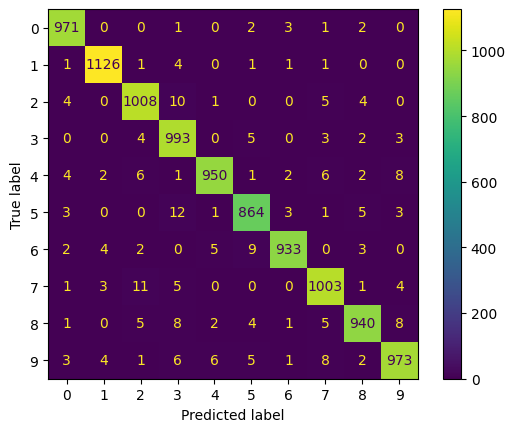

In [10]:
y_true, y_pred = evaluateModel(model)
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
confusionMatrix = confusion_matrix(y_true, y_pred)
display = ConfusionMatrixDisplay(confusionMatrix,display_labels= np.arange(10))
display.plot()
print(f"Confusion Matrix: {confusionMatrix}")


accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_true, y_pred, average = 'macro')
print(f'Precision: {precision}')
recall = recall_score(y_true, y_pred, average = 'macro')
print(f'Recall: {recall}')
f1 = f1_score(y_true, y_pred, average = 'macro')
print(f'F1: {f1}')